# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».|


# <a name="contents">Задачи исследования — Сборный проект</a>

## 1. Откройте файл с данными и изучите общую информацию
Путь к файлу:
- /datasets/games.csv

## 2. Подготовьте данные
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

- Приведите данные к нужным типам:
    - Опишите, в каких столбцах пришлось заменить тип данных и почему
    
- Обработайте пропуски при необходимости:
    - Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
    - Опишите возможные причины возникновения пропусков
    

## 3. Проведите исследовательский анализ данных
- Постройте распределение по годам релиза и опишите полученный результат
- Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
- Постройте график продаж по каждому году; сделайте вывод
- Постройте ящик с усами по глобальным продажам, опишите полученный результат
- Узнайте, на какой платформе было выпущено больше всего игр
- Определите, игр какого жанра больше всего
- Найдите игры с наибольшей и наименьшей оценкой от пользователей
- Найдите игры с наибольшей и наименьшей оценкой от критиков
- Оцените корреляцию между оценками критиков и пользовательскими оценками


## 4. Составьте портрет пользователя для каждого региона
Для пользователей каждого региона (Северная Америка, Европа и Япония) определите:
- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ
- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)


## 5. Проверьте гипотезы
- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


## 6. Напишите общий вывод
- Общие выводы
- Рекомендации


## Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


## 1. Откройте файл с данными и изучите общую информацию
Путь к файлу:
- /datasets/games.csv

In [2]:
data_dirty = pd.read_csv('C:/Users/oudel/OneDrive/Рабочий стол/data_analyst/4) Сборный проект №1/games.csv')
data_dirty.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


все как обычно:

    1) много пустых данных
    2) сплошняком float
    3) много object
    4) всего строк - 16714

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Подготовьте данные
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

- Приведите данные к нужным типам:
    - Опишите, в каких столбцах пришлось заменить тип данных и почему
    
- Обработайте пропуски при необходимости:
    - Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
    - Опишите возможные причины возникновения пропусков

In [4]:
# меняем наименование столбцов

new_column_name = data_dirty.columns.str.lower()
data_dirty.columns = new_column_name
data_dirty = data_dirty.rename({'name': 'game_name'}, axis = 1)
data_dirty.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# считаем количество продаж во всех регионах и записываем в отдельный столбец

data_dirty['all_sales'] = data_dirty['na_sales'] + data_dirty['eu_sales'] + data_dirty['jp_sales'] + data_dirty['other_sales']
data_dirty.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [6]:
# Привести данные к нужным типам

data_dirty['game_name'] = data_dirty['game_name'].fillna('безымянная игра')
data_dirty['genre'] = data_dirty['genre'].fillna('безжанровая игра')

In [7]:
# Год - float, переведем в int, но для этого заполним пустые значения цифрой 1961 (полет Юрки)

data_dirty['year_of_release'] = data_dirty['year_of_release'].fillna(1961)
data_dirty['year_of_release'] = data_dirty['year_of_release'].map(lambda x: int(x + (0.5 if x > 0 else -0.5)))  # мат. округление
data_dirty['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1961, 1995,
       1991, 1981, 1987, 1980, 1983], dtype=int64)

In [8]:
# user_score по сути должна быть float но она object - посмотрим почему

data_dirty['user_score'].unique()   # есть 'tbd' - это расшифровывается как ---> to be determined = будет определено.

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
# Проще всего заменить 'tbd' --> nan (на 0 нельзя т.к. это тоже оценка)

def func(x):
    if x == 'tbd':
        return np.nan
    else:
        return x

data_dirty['user_score'] = data_dirty['user_score'].map(lambda x: func(x))
data_dirty['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [10]:
# Посмотрим на оценку критиков

data_dirty['critic_score'].unique() # впринципе можно заполнить -1

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
data_dirty['critic_score'] = data_dirty['critic_score'].fillna(-1).astype(int)
data_dirty['critic_score'].unique()

array([76, -1, 82, 80, 89, 58, 87, 91, 61, 97, 95, 77, 88, 83, 94, 93, 85,
       86, 98, 96, 90, 84, 73, 74, 78, 92, 71, 72, 68, 62, 49, 67, 81, 66,
       56, 79, 70, 59, 64, 75, 60, 63, 69, 50, 25, 42, 44, 55, 48, 57, 29,
       47, 65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39,
       34, 35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 22, 13])

In [12]:
# меняем тип данных в столбце user_score на float и также пустые значения заполним -1

data_dirty['user_score'] = data_dirty['user_score'].astype(float)
data_dirty['user_score'] = data_dirty['user_score'].fillna(-1)
data_dirty['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [13]:
# Постморим на данные рейтингов

data_dirty['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
# Заменим значение nan --> 'отсутствует возрастная категория'

data_dirty['rating'] = data_dirty['rating'].fillna('отсутствует возрастная категория')
data_dirty['rating'].unique()

array(['E', 'отсутствует возрастная категория', 'M', 'T', 'E10+', 'K-A',
       'AO', 'EC', 'RP'], dtype=object)

In [15]:
# проверка на дубликаты

data_dirty.duplicated().sum()

0

In [16]:
data_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_name        16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  all_sales        16715 non-null  float64
dtypes: float64(6), int32(1), int64(1), object(4)
memory usage: 1.5+ MB


итого :

    1) есть незаполненные названия игр (2 позиции) --> 'безыменная игра'
    2) год релиза игры: пропуски заполнили годом 1961 ислючительно для анализа (что не противоречит датам (тогда игры вообще не выходили))
    3) жанр игры - 2 пропуска --> 'безжанровая игра'
    4) Оценка критиков - куча пропусков --> заменили на -1  (слишком много пропусков)
    5) Оценка пользователей - куча пропусков --> заменили на -1  (слишком много пропусков)
    6) в возрастном рейтинге заменили значение nan --> 'отсутствует возрастная категория'


Пропуски могли получиться из-за ошибке на сервере. Например: Играм на разных платформах могли присуждаться разные рейтинги --> система выдавала это как ошибку  

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Проведите исследовательский анализ данных

- Постройте распределение по годам релиза и опишите полученный результат
- Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
- Постройте график продаж по каждому году, сделайте вывод
- Постройте ящик с усами по глобальным продажам, опишите полученный результат
- Узнайте, на какой платформе было выпущено больше всего игр
- Определите, игр какого жанра больше всего
- Найдите игры с наибольшей и наименьшей оценкой от пользователей
- Найдите игры с наибольшей и наименьшей оценкой от критиков
- Оцените корреляцию между оценками критиков и пользовательскими оценками

#### 3.1) Распределение игр по годам релиза

Text(0.5, 1.0, 'распределение выпускаемых игр по годам релиза')

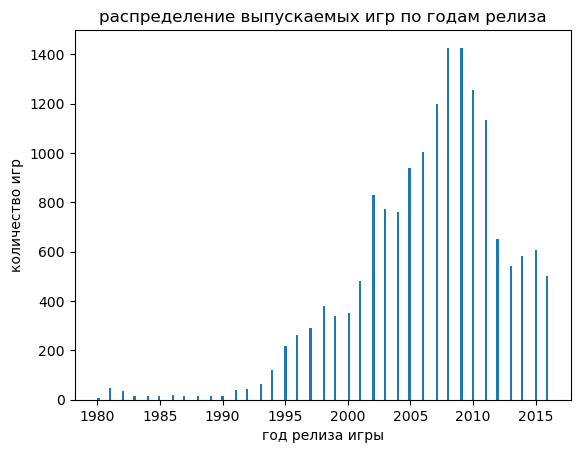

In [17]:
data_dirty[data_dirty['year_of_release'] != 1961]['year_of_release'].plot(kind = 'hist',
                                                                          bins = 200)
plt.xlabel('год релиза игры')
plt.ylabel('количество игр')
plt.title('распределение выпускаемых игр по годам релиза')

видим скудный выпуск в период 1980 - 1991 г.г.
потом прогресс на лицо (улучшение процессорных и видео мощностей )
с 2009 года - спад (последствия экономического кризиса 2008 г.)
с 2012 года - видим стагнацию - явный признак устоявшегося рынка видиогейминга
(некоторые производители ушли в мобильный гейминг и т.д. Кадровые и денежные ресурсы распределены и закреплены)

#### 3.2) Постройте распределение по годам релиза для игр с отзывом и без отзыва, cравните полученные распределения и сделайте вывод

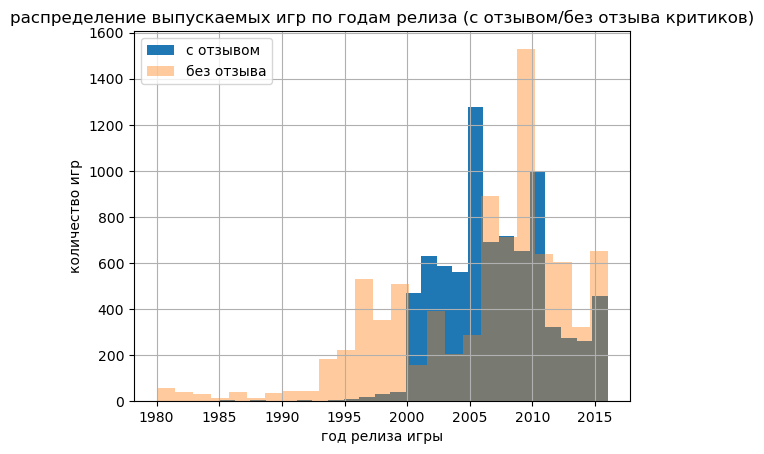

In [18]:
# Построим распределение релизнутых игр по отзывам критиков


data_dirty[(data_dirty['critic_score'] != -1) & (data_dirty['year_of_release'] != 1961)]['year_of_release'].plot(kind = 'hist',
                                                                                                                 bins = 25,
                                                                                                                 label = 'с отзывом')



data_dirty[(data_dirty['critic_score'] == -1) & (data_dirty['year_of_release'] != 1961)]['year_of_release'].plot(kind = 'hist',
                                                                                                                 bins = 25,
                                                                                                                 alpha = 0.4,
                                                                                                                 label = 'без отзыва')

plt.legend()
plt.xlabel('год релиза игры')
plt.ylabel('количество игр')
plt.title('распределение выпускаемых игр по годам релиза (с отзывом/без отзыва критиков)')
plt.grid()

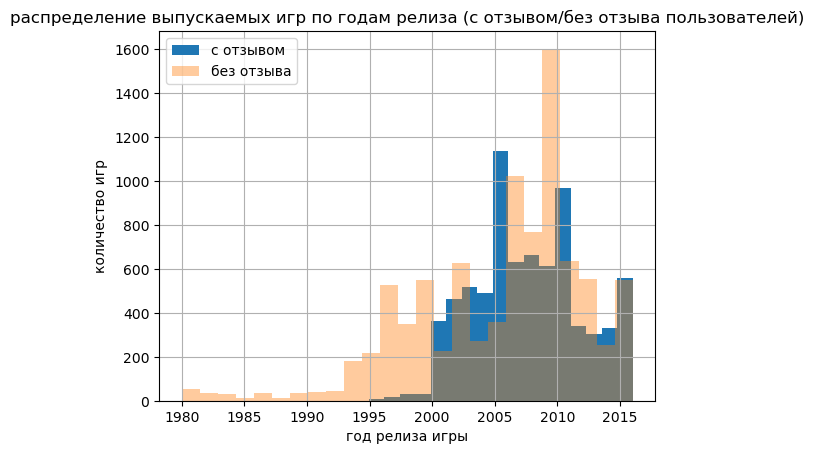

In [19]:
# Построим распределение релизнутых игр по отзывам пользователей


data_dirty[(data_dirty['user_score'] != -1) & (data_dirty['year_of_release'] != 1961)]['year_of_release'].plot(kind = 'hist',
                                                                                                               bins = 25,
                                                                                                               label = 'с отзывом')



data_dirty[(data_dirty['user_score'] == -1) & (data_dirty['year_of_release'] != 1961)]['year_of_release'].plot(kind = 'hist',
                                                                                                               bins = 25,
                                                                                                               alpha = 0.4,
                                                                                                               label = 'без отзыва')

plt.legend()
plt.xlabel('год релиза игры')
plt.ylabel('количество игр')
plt.title('распределение выпускаемых игр по годам релиза (с отзывом/без отзыва пользователей)')
plt.grid()

распределения идентичные ---> мнения критиков игровой индустрии часто совпадает с мнением пользователей ( это вам не кино )

#### 3.3) Постройте график продаж по каждому году, сделайте вывод

C:\Users\oudel\AppData\Local\Temp\ipykernel_2088\692704165.py:2: UserWarning: The label '_' of <matplotlib.lines.Line2D object at 0x000002A369DD13A0> starts with '_'. It is thus excluded from the legend.
  data_dirty[data_dirty['year_of_release'] != 1961].groupby('year_of_release')[i].sum().plot().legend(i)


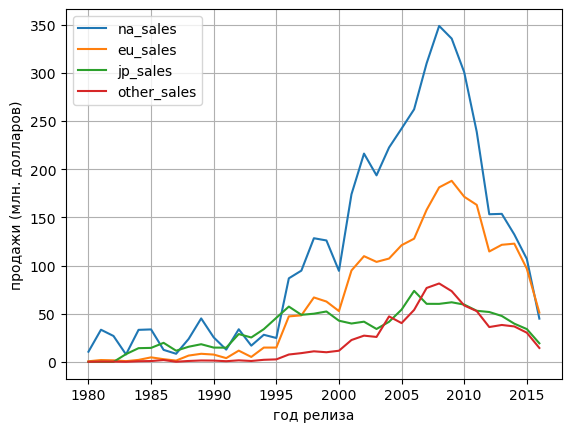

In [20]:
for i in ['na_sales','eu_sales', 'jp_sales','other_sales']:
    data_dirty[data_dirty['year_of_release'] != 1961].groupby('year_of_release')[i].sum().plot().legend(i)

plt.xlabel('год релиза')
plt.ylabel('продажи (млн. долларов)')
plt.legend()
plt.grid()

С 1980 - 1995 г.г. скачки продаж в Северной Америке ( рынок постепенно заполняется, компании прощупывают пользовательский интерес и основную аудиторию )
                   Рост в Японии, Европе    

По всем представленным регионам - рост с 1995 - 2008 г.г.

С 2008 года (мировой кризис) - падение продаж по всем регионам





#### 3.4) Постройте ящик с усами по глобальным продажам, опишите полученный результат

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: all_sales, dtype: float64

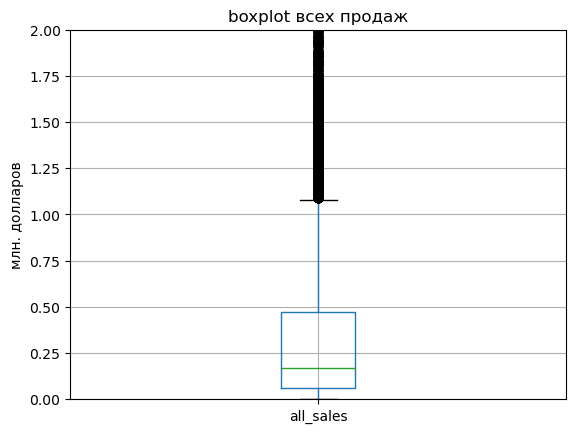

In [21]:
data_dirty.boxplot(column = 'all_sales').set_ylim(0,2)
plt.ylabel('млн. долларов')
plt.title('boxplot всех продаж')

data_dirty['all_sales'].describe()

Типичные показатель рискового игрового бизнеса --> возможны большие продажи, а возможно и нулевые

#### 3.5) Узнайте, на какой платформе было выпущено больше всего игр

In [22]:
data_dirty['platform'].value_counts().head()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
Name: platform, dtype: int64

2161 игра была выпущена на PlayStation 2, НО Nintendo DS не отстает (2151 шт.)

#### 3.6) Определите, игр какого жанра больше всего

In [23]:
data_dirty['genre'].value_counts().head()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Name: genre, dtype: int64

Больше всего игр жанра - Экшен

#### 3.7) Найдите игры с наибольшей и наименьшей оценкой от пользователей

In [24]:
data_dirty[data_dirty['user_score'] != -1].sort_values(by = 'user_score')

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.00,0.00,0.06,-1,0.0,E,0.72
13682,Myth Makers: Trixie in Toyland,Wii,2008,Platform,0.04,0.00,0.00,0.00,-1,0.2,E,0.04
9970,Madden NFL 17,PS3,2016,Sports,0.07,0.02,0.00,0.02,-1,0.2,E,0.11
13380,Billy the Wizard: Rocket Broomstick Racing,Wii,2007,Racing,0.04,0.00,0.00,0.00,-1,0.3,E,0.04
5764,Happy Feet,DS,2006,Action,0.27,0.01,0.00,0.02,-1,0.3,E,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1645,Golden Sun: The Lost Age,GBA,2002,Role-Playing,0.61,0.27,0.27,0.07,86,9.5,E,1.22
11119,Super Puzzle Fighter II,GBA,1961,Puzzle,0.06,0.02,0.00,0.00,83,9.5,E,0.08
8975,Boktai: The Sun is in Your Hand,GBA,2003,Role-Playing,0.10,0.04,0.00,0.00,83,9.6,E,0.14
3417,Harvest Moon: Friends of Mineral Town,GBA,2003,Simulation,0.34,0.13,0.11,0.01,81,9.6,E,0.59


Наименьшая оценка пользователей у игр: 
            
                1) My Little Pony: Pinkie Pie's Party (0/10 - если это вообще оценка а не ошибка системы, НО игра - кал однозначно)	
                2) Myth Makers: Trixie in Toyland ( 0.2/10 )
                3) Madden NFL 17 ( 0.2/10 )

Наибольшая оценка пользователей у игр: 

                1) Breath of Fire III ( 9.7/10 )
                2) Harvest Moon: Friends of Mineral Town ( 9.6/10 )
                3) Boktai: The Sun is in Your Hand ( 9.6/10 )

#### 3.8) Найдите игры с наибольшей и наименьшей оценкой от критиков

In [25]:
data_dirty[data_dirty['critic_score'] != -1].sort_values(by = 'critic_score')

,game_name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.00,0.01,13,1.0,M,0.04
10662,Leisure Suit Larry: Box Office Bust,PS3,2009,Adventure,0.06,0.03,0.00,0.01,17,1.7,M,0.10
12822,Ride to Hell,X360,2013,Racing,0.04,0.01,0.00,0.01,19,1.3,M,0.06
10015,Rugby 15,PS4,2015,Sports,0.04,0.06,0.00,0.02,19,3.4,E,0.12
15343,Balls of Fury,Wii,2007,Sports,0.02,0.00,0.00,0.00,19,2.8,E10+,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Super Mario Galaxy 2,Wii,2010,Platform,3.56,2.35,0.98,0.62,97,9.1,E,7.51
57,Grand Theft Auto IV,PS3,2008,Action,4.76,3.69,0.44,1.61,98,7.5,M,10.50
5350,SoulCalibur,DC,1999,Fighting,0.00,0.00,0.34,0.00,98,8.8,T,0.34
227,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,98,7.7,T,4.68


Наименьшая оценка критиков у игр: 

                1) Ride to Hell	( 13/100 )
                2) Leisure Suit Larry: Box Office Bust (17/100)

Наибольшая оценка критиков у игр: 

                1) Grand Theft Auto IV ( 98/100 )
                2) Tony Hawk's Pro Skater 2	(98/100)
                3) SoulCalibur (98/100)
                4) Super Mario Galaxy 2	(98/100)


#### 3.9) Оцените корреляцию между оценками критиков и пользовательскими оценками

In [26]:
data_dirty[(data_dirty['critic_score'] != -1) & (data_dirty['user_score'] != -1)][['critic_score','user_score']].corr().round(2)

,critic_score,user_score
critic_score,1.00,0.58
user_score,0.58,1.00


Зависимость между оценкой критиков ипользователей ЕСТЬ ( очевидно - критики пытаются угодить пользователям )

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Составьте портрет пользователя для каждого региона

#### 4.1) топ-5 предпочтительных жанров

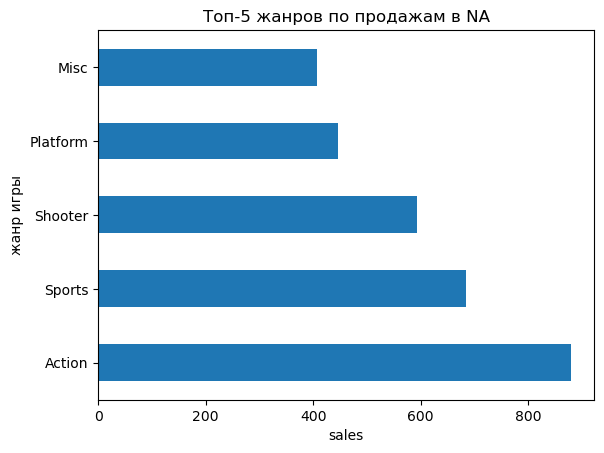

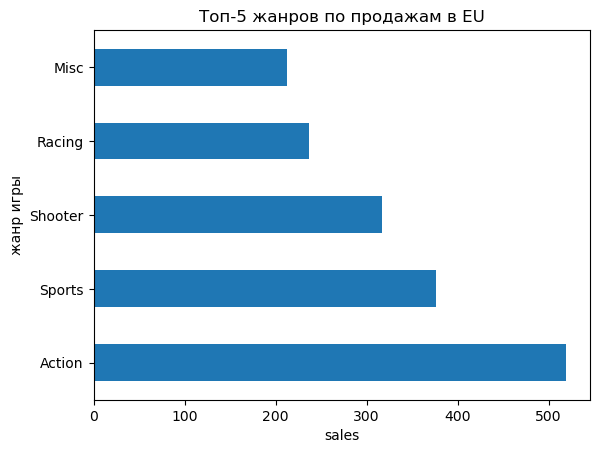

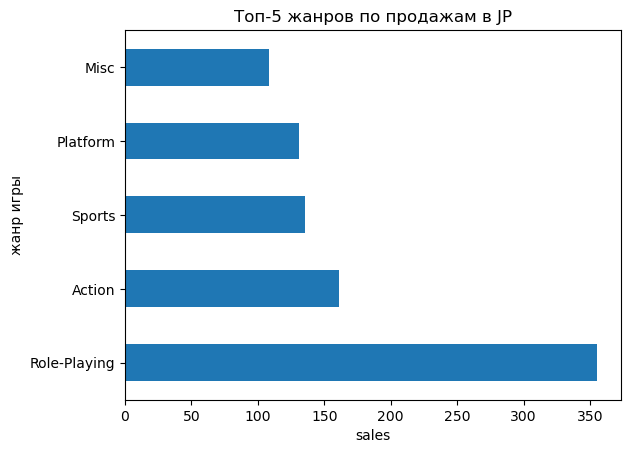

In [27]:
for i in ['na_sales','eu_sales','jp_sales']:    
    data_dirty.groupby('genre')[i].sum() \
                                  .sort_values(ascending=False) \
                                  .head(5) \
                                  .plot(kind = 'barh',
                                        xlabel=i[-5:],
                                        ylabel='жанр игры',
                                        title=f'Топ-5 жанров по продажам в {str.upper(i[:2])}')
    plt.show()

В Северной Америке и Европе предпочитают экшены, а в Японии - ролевые игры

#### 4.2) В какие года пользователи были наиболее активны (больше всего покупали игры)

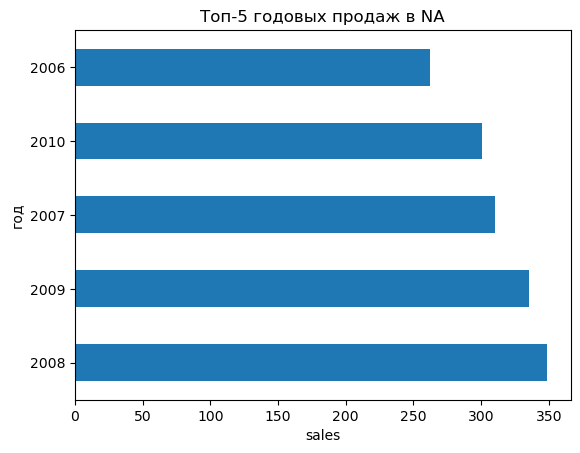

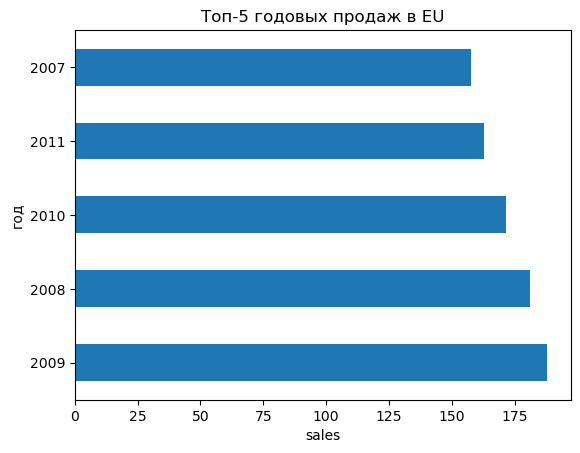

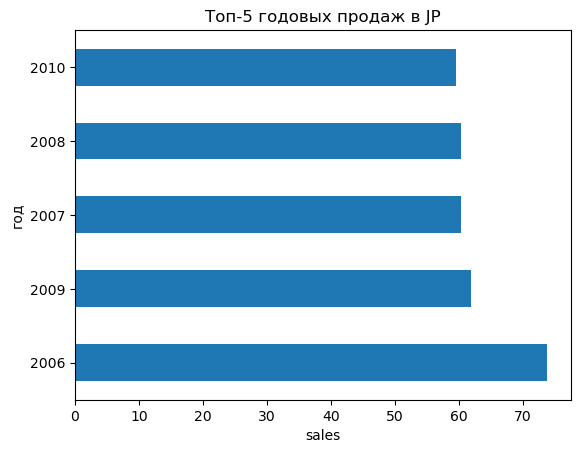

In [28]:
for i in ['na_sales','eu_sales','jp_sales']:
      data_dirty[data_dirty['year_of_release'] != 1961].groupby('year_of_release')[i].sum() \
                                                                                     .sort_values(ascending=False) \
                                                                                     .head(5) \
                                                                                     .plot(kind = 'barh',
                                                                                           xlabel=i[-5:],
                                                                                           ylabel='год',
                                                                                           title=f'Топ-5 годовых продаж в {str.upper(i[:2])}')
      plt.show()

Топовые по продажам года в Северной Америке: 2006-2010 г.г.
                           Европе: 2007-2011 г.г.
                           Японии: 2006-2010 г.

Как мы выяснили раньше - из-за кризиса игр выпускалось меньше
Меньшее кол-во выпускаемых игр ( а именно в этих годах был мировой кризис ) --> больший ажиотаж к ним (спрос гигантский, предложение малое)

#### 4.3) топ-5 предпочтительных платформ

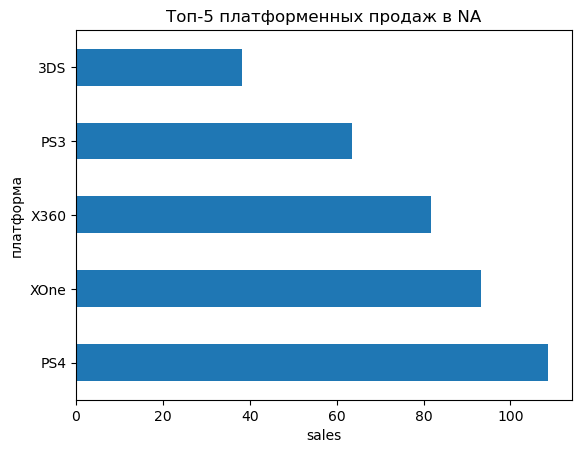

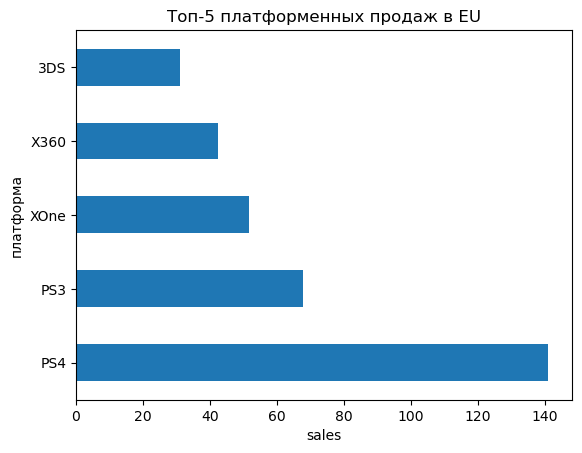

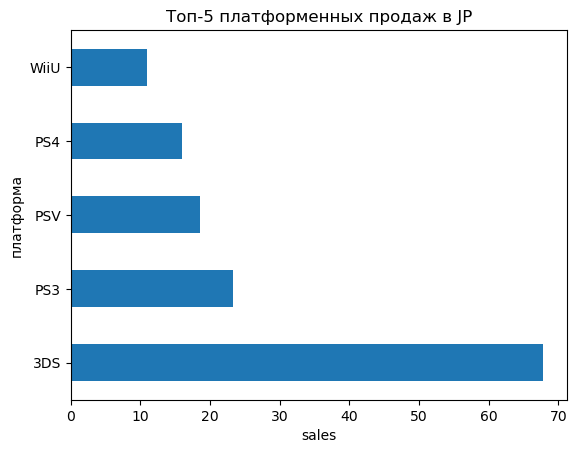

In [29]:
# Ограничимся последними годами (многи платформы устарели и смысла их рассматривать нет)

for i in ['na_sales','eu_sales','jp_sales']:

      data_dirty[data_dirty['year_of_release'] >= 2013].groupby('platform')[i].sum() \
                                                       .sort_values(ascending=False) \
                                                       .head(5) \
                                                       .plot(kind='barh',
                                                             xlabel=i[-5:],
                                                             ylabel='платформа',
                                                             title=f'Топ-5 платформенных продаж в {str.upper(i[:2])}')
      plt.show()

Предпочтительные платформы:

    NA: PS4, XOne, X360
    EU: PS4, PS3, XOne, X360
    JP: 3DS

#### 4.4) Какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

C:\Users\oudel\AppData\Local\Temp\ipykernel_2088\812969086.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rating['rating'] = data_rating['rating'].map(slovar)


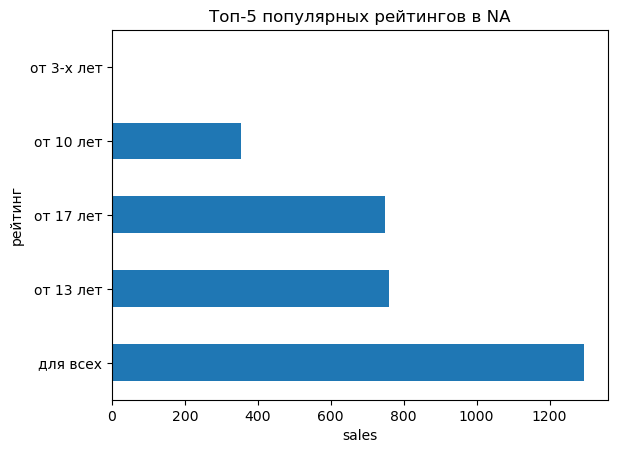

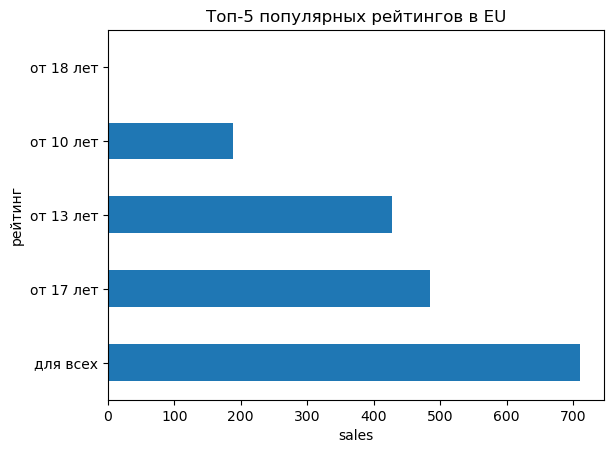

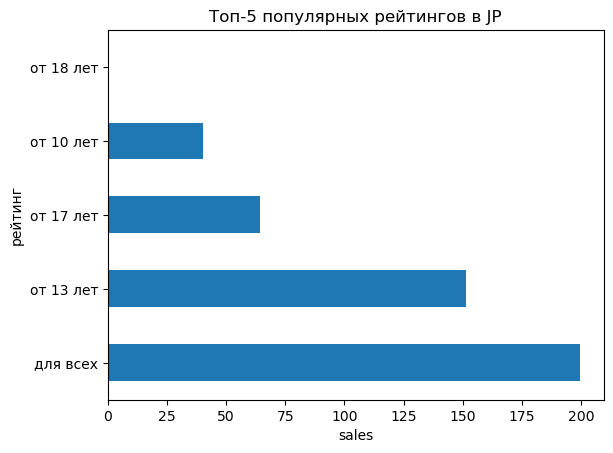

In [30]:
'''
Рейтинг переводится так:

EC - от 3-х лет
E - для всех
E10+ - от 10 лет
T - от 13 лет
M - от 17 лет
AO - от 18 лет
RP - рейтинг ожидается
RP 17+  - рейтинг ожидается (но скорее всего 17+)
K-A - для всех (старое название, сейчас это рейтинг --> E10+)


Источник:

https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

'''

slovar = {'E': 'для всех',
          'M': 'от 17 лет',
          'T': 'от 13 лет',
          'E10+': 'от 10 лет',
          'K-A': 'для всех',
          'AO': 'от 18 лет',
          'EC': 'от 3-х лет',
          'RP': 'от 10 лет'}

data_rating = data_dirty[data_dirty['rating'] != 'отсутствует возрастная категория']
data_rating['rating'] = data_rating['rating'].map(slovar)

for i in ['na_sales','eu_sales','jp_sales']:
    data_rating.groupby('rating')[i].sum() \
                                    .sort_values(ascending=False) \
                                    .head(5) \
                                    .plot(kind = 'barh',
                                          xlabel=i[-5:],
                                          ylabel='рейтинг',
                                          title=f'Топ-5 популярных рейтингов в {str.upper(i[:2])}')
    plt.show()


Наиболее частые возрастные категории:

        NA/EU: для всех  ( также большая популярность игр с рейтингом 13+/17+, игры с рейтингом 10+ - менее популяпны, как и игры 3+ / 18+)
           JP: для всех (также очень популярны игры 13+, много меньше популярности у 17+, самые не популярные - 10+, 18+)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 5. Проверьте гипотезы

- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему

#### 5.1) Средний пользовательский рейтинг платформ PS2 и PS3 одинаковый


Выборки независимы --> воспользуемся t-критерием Стьюдента

Сформулируем гипотезы:

        H0: Средний пользовательский рейтинг платформ PS2 и PS3 одинаковый
        H1: Средний пользовательский рейтинг платформ PS2 и PS3 разный

In [31]:
# Выделяем данные по PS2 и по PS3

data_5_1_PS2_user_score = data_dirty[(data_dirty['platform'] == 'PS2') & (data_dirty['user_score'] != -1)]['user_score']
data_5_1_PS3_user_score = data_dirty[(data_dirty['platform'] == 'PS3') & (data_dirty['user_score'] != -1)]['user_score']

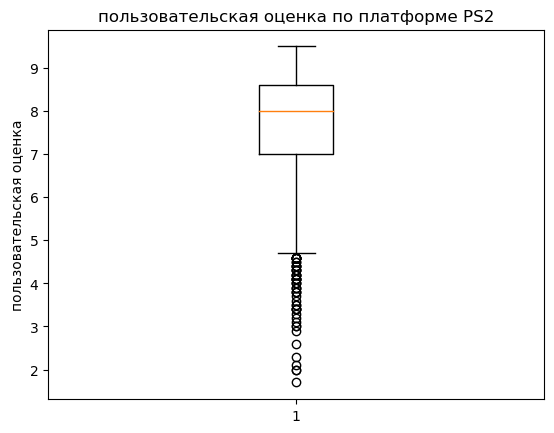

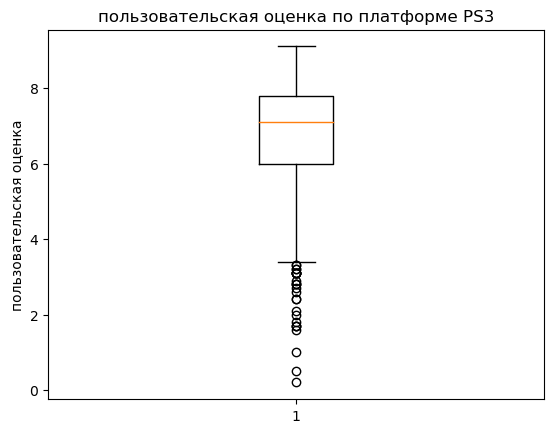

In [32]:
# Посмотрим на количество выбросы по выборкам

plt.boxplot(data_5_1_PS2_user_score)
plt.ylabel('пользовательская оценка')
plt.title('пользовательская оценка по платформе PS2')
plt.show()

plt.boxplot(data_5_1_PS3_user_score)
plt.ylabel('пользовательская оценка')
plt.title('пользовательская оценка по платформе PS3')
plt.show()


In [33]:
# Этап удаления выбросов из каждой выборки

def vibros_identification_create_filter_frame(df,                           
                                              spisok_priznakov):
    
    '''
    df - датафрейм который мы фильтруем по выбросам
    spisok_main_priznakov - список названий колонок про которым мы фильтруем выбросы

    Например: 

    spisok_main_priznakov = ['цена на момент снятия с публикации (млн. руб.)',
                             'площадь квартиры в квадратных метрах (м²)',
                             'всего этажей в доме',
                             'высота потолков (м)',
                             'площадь кухни (м²)',
                             'жилая площадь (м²)']
    '''
    
    data_new = df.copy()

    for column_name in spisok_priznakov:
        q1 = df[column_name].quantile(0.25)
        q3 = df[column_name].quantile(0.75)
        IQR = q3-q1     # интерквартильный размах 


        filter_for_kolonka = (df[column_name] >= (q1 - 1.5*IQR)) & (df[column_name] <= (q3 + 1.5*IQR))   # Получаем маску признаков без выбросов

        indexes = data_new[filter_for_kolonka].index
        data_new = data_new.loc[indexes] 
        
    return data_new


data_5_1_PS2_user_score = pd.DataFrame(data_5_1_PS2_user_score)
data_5_1_PS3_user_score = pd.DataFrame(data_5_1_PS3_user_score)


data_5_1_PS2_user_score = vibros_identification_create_filter_frame(data_5_1_PS2_user_score,
                                                                    ['user_score'])
data_5_1_PS3_user_score = vibros_identification_create_filter_frame(data_5_1_PS3_user_score,
                                                                    ['user_score'])

In [34]:
print(np.var(data_5_1_PS2_user_score['user_score']))
print(np.var(data_5_1_PS3_user_score['user_score']))

1.0300821482377647
1.543052382002798


Дисперсии близки --> equal_var = True

In [35]:
alpha = 0.05

test = st.ttest_ind(data_5_1_PS2_user_score['user_score'],
                    data_5_1_PS3_user_score['user_score'])
print(test)     # statistic --> t-критерий,   p-value - вероятность того, что результаты выборки данных произошли случайно

if alpha > test.pvalue:
    print('отвергаем H0')
else:
    print('При выбранном alpha - H0 не отвергаем')

Ttest_indResult(statistic=18.76554026458512, pvalue=1.396552346857348e-72)
отвергаем H0


#### 5.2) Cредний пользовательский рейтинг жанров Action и Sports различается


Выборки независимы --> воспользуемся t-критерием Стьюдента

Сформулируем гипотезы:

        H0: Cредний пользовательский рейтинг жанров Action и Sports одинаковый
        H1: Cредний пользовательский рейтинг жанров Action и Sports различается

In [36]:
data_5_2_Action = data_dirty[(data_dirty['genre'] == 'Action') & (data_dirty['user_score'] != -1)]
data_5_2_Sports = data_dirty[(data_dirty['genre'] == 'Sports') & (data_dirty['user_score'] != -1)]

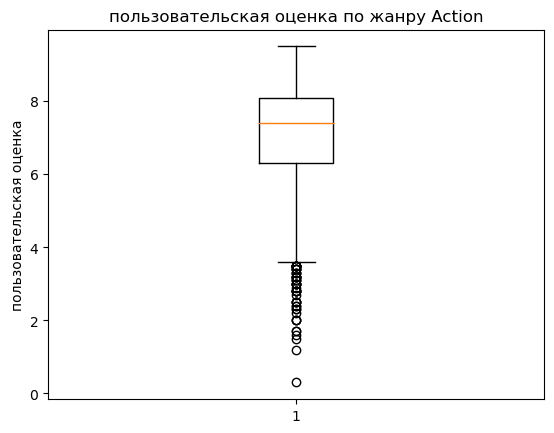

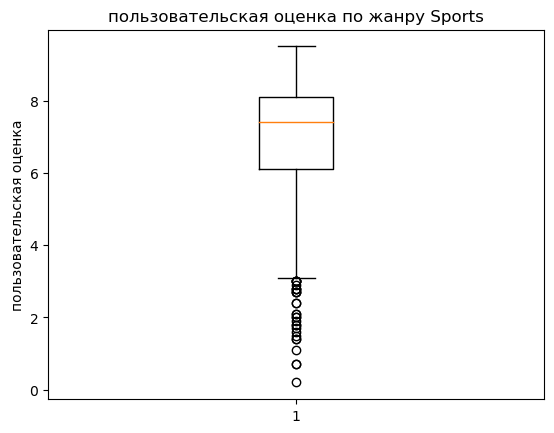

In [37]:
# Посмотрим на количество выбросы по выборкам

plt.boxplot(data_5_2_Action['user_score'])
plt.ylabel('пользовательская оценка')
plt.title('пользовательская оценка по жанру Action')
plt.show()

plt.boxplot(data_5_2_Sports['user_score'])
plt.ylabel('пользовательская оценка')
plt.title('пользовательская оценка по жанру Sports')
plt.show()

In [38]:
# Фильтрация выбросов

data_5_2_Action = vibros_identification_create_filter_frame(data_5_2_Action,
                                                            ['user_score'])
data_5_2_Sports = vibros_identification_create_filter_frame(data_5_2_Sports,
                                                            ['user_score'])

In [39]:
alpha = 0.05

test = st.ttest_ind(data_5_2_Action['user_score'],
                    data_5_2_Sports['user_score'])
print(test)     # statistic --> t-критерий,   p-value - вероятность того, что результаты выборки данных произошли случайно

if alpha > test.pvalue:
    print('отвергаем H0')
else:
    print('При выбранном alpha - H0 не отвергаем')

Ttest_indResult(statistic=1.6879402173342428, pvalue=0.09153219432780303)
При выбранном alpha - H0 не отвергаем


Вывод:
	
	1) Рост игровой индустрии произошел в 1994 г.
	2) В Кризисные годы (2008-2011) игр выпускали меньше
	3) Мнение критиков зачастую совпадает с мнением пользователей (журналисты - коньюктурщики)
	4) Игровая индустрия - рискованное мероприятие ( с т.з. окупаемости )
	5) Экшен игр больше всего
	6) Самый продаваемый жарн игры: NA/EU - экшен, JP - ролевые
	7) В кризисные года игры продавались лучше всего
	9) Предпочтительные платформы: NA: PS4, XOne, X360
    				       		   EU: PS4, PS3, XOne, X360
    				               JP: 3DS
	10) Самые популярные игры: NA/EU: для всех  ( 13+/17+ - тоже перспективные, игры с рейтингом 10+ / 3+ / 18+ - малые продажи)
        			              JP: для всех (13+ - перспективные,  17+ / 10+ / 18+ - малые продажи)
	
	11) Средний пользовательский рейтинг платформ PS2 и PS3 разный
	12) Cредний пользовательский рейтинг жанров Action и Sports одинаковый



Рекомендации:


	1) Делать ставку на Экшен игр (в NA/EU) а в японском сегменте --> ролевые игры 
	2) Фокус на платформы PS4, PS3 (NA/EU) , 3DS (Япония)
	3) Фокус на игры "для всех", также 13+/17+ ( NA/EU ) , 13+ (Япония)